In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics

# Transforming data for linear classification

In [2]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [3]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

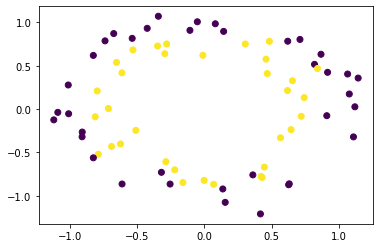

In [4]:
x1,x2,y = np.loadtxt('Et2_Classification_TrainingData.csv', delimiter=',', unpack=True)
plt.scatter(x1,x2,c=y)
plt.show()
#print(x1)
#print(x2)

<class 'numpy.ndarray'>
(70,)


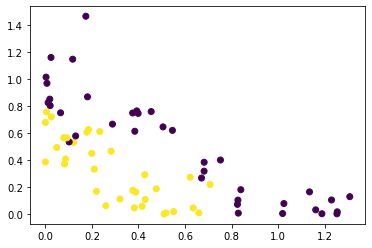

(70, 2)


In [5]:
x3 = np.square(x1)
#print(x3)
print(type(x3))

x4 = np.square(x2)
#print(x4)
print(x4.shape)

plt.scatter(x3,x4,c=y)
plt.show()

X = np.column_stack((x1,x2))
#print(X)
print(X.shape)

Accuracy in training 0.4714285714285714
Accuracy in test 0.36666666666666664
Ein and Eout are not close. This typically shows high variance which is a feature of more complex model


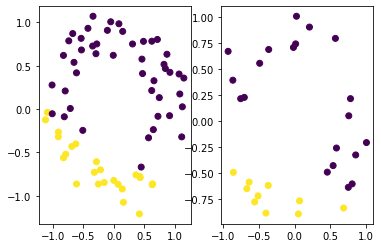

In [6]:
model = LogisticRegression(random_state=0).fit(X, y)
y_pred = model.predict(X)


x1_test,x2_test,y_test = np.loadtxt('Et2_Classification_TestData.csv', delimiter=',', unpack=True)
X_test = np.column_stack((x1_test,x2_test))
y_pred_test = model.predict(X_test)

print("Accuracy in training", metrics.accuracy_score(y_pred,y))
print("Accuracy in test", metrics.accuracy_score(y_pred_test,y_test))
print("Ein and Eout are not close. This typically shows high variance which is a feature of more complex model")

plt.subplot(1, 2, 1)
plt.scatter(x1,x2,c= y_pred)
plt.subplot(1, 2, 2)
plt.scatter(x1_test,x2_test,c= y_pred_test)
plt.show()

[-0.10492216312164211, -0.08991950240627546, -0.20308468934510995]


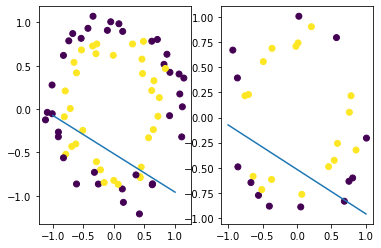

In [7]:
model.coef_
weights = [model.intercept_[0],model.coef_[0][0],model.coef_[0][1]]
print(weights)
X_dec = [-1,1]
y_dec = decision_boundary(weights, X_dec[0], X_dec[1])


plt.subplot(1, 2, 1)
plt.scatter(x1,x2,c= y)
plt.plot(X_dec,y_dec)
plt.subplot(1, 2, 2)
plt.scatter(x1_test,x2_test,c= y_test)
plt.plot(X_dec,y_dec)
plt.show()

In [8]:
X_t = np.column_stack((x3,x4))
#print(X)
print(X.shape)


(70, 2)


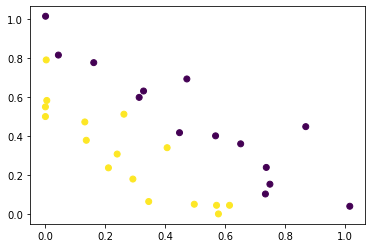

In [9]:
model_t = LogisticRegression(random_state=0).fit(X_t, y)
x3_test = np.square(x1_test)
x4_test = np.square(x2_test)
X_t_test = np.column_stack((x3_test,x4_test))
y_pred_t_test = model_t.predict(X_t_test)

#plt.scatter(x1,x2,c= y_pred_t)
plt.scatter(x3_test,x4_test,c= y_pred_t_test)
plt.show()

#print("Accuracy in train", metrics.accuracy_score(y_pred_t,y))
#print("Accuracy in test", metrics.accuracy_score(y_pred_t_test,y_test))
#print("Ein and Eout are very close. This typically shows low variance which is a feature of less complex model")


[1.9057118243895126, -2.4461369519870044, -2.320722116217899]


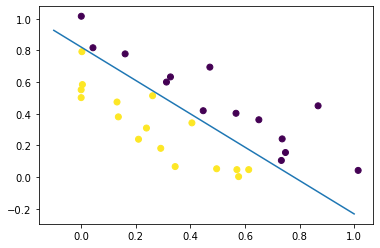

In [16]:
model_t.coef_
weights = [model_t.intercept_[0],model_t.coef_[0][0],model_t.coef_[0][1]]
print(weights)
X_dec = [-0.1,1]
y_dec = decision_boundary(weights, X_dec[0], X_dec[1])
plt.scatter(x3_test,x4_test,c= y_pred_t_test)
plt.plot(X_dec,y_dec)



# Regularization

Below is an implementation of linear regression with regularization

In [38]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

0


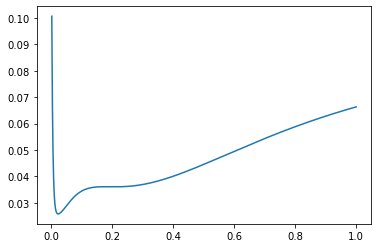

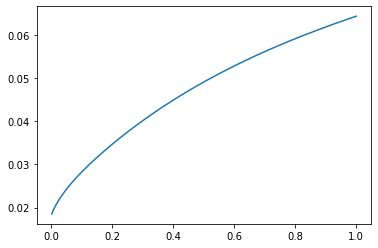

In [44]:
X,y = np.loadtxt('ET2_Regression_Data.csv', delimiter=',', unpack=True)
#print(X)
ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0.001,1,1000)

#print(lambdas.shape)
#print(lambdas)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    
e_in_min_index = np.argmin(ein)
print(e_in_min_index)


plt.plot(lambdas,eout)
plt.show()

plt.plot(lambdas,ein)
plt.show()


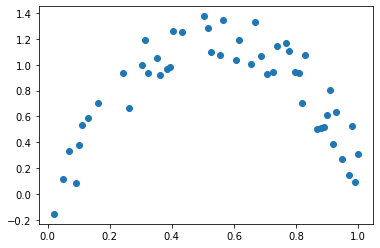

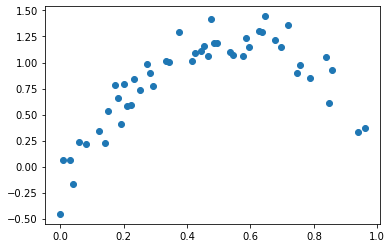

In [45]:
plt.scatter(X_test[:,0],y_test)
plt.show()
plt.scatter(X_train[:,0],y_train)
plt.show()

In [47]:
# No regularization - lambda =0

w_simple = weights_reg(X_train,y_train,0)
eout_simple= calc_error(w_simple,X_test,y_test)
print(eout_simple)

26790138.7504562


0.022000000000000002
0.025763319686790423


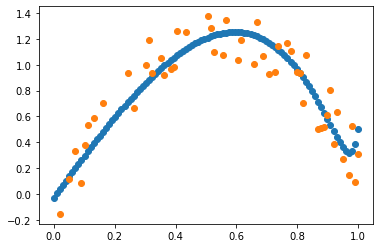

In [51]:
# Best model is with least Eout
eout_index = np.argmin(eout)
print(lambdas[eout_index])
weights_eout = weights[eout_index]
y_eout_min = linreg_predict(weights_eout,X_trans)
plt.scatter(X,y_eout_min)
plt.scatter(X_test[:,0],y_test)

#  regularization - lambda is optimal

w_simple = weights_reg(X_train,y_train,lambdas[eout_index])
eout_simple= calc_error(w_simple,X_test,y_test)
print(eout_simple)

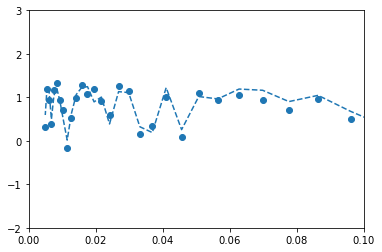

In [49]:
#Weights with different lamda

# Overfit model- when lambda is too low
w_l = weights_reg(X_train,y_train,0.0157)
y_ein_min = linreg_predict(w_l,X_test)

plt.plot(X_test[0],y_ein_min,linestyle='dashed')
plt.xlim(0,0.1)
plt.ylim(-2,3)
plt.scatter(X_test[0],y_test)
            

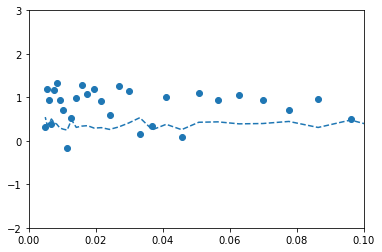

In [50]:
# Underfit model- when lamda is too high

w_l = weights_reg(X_train,y_train,100)
y_ein_min = linreg_predict(w_l,X_test)

plt.plot(X_test[0],y_ein_min,linestyle='dashed')
plt.xlim(0,0.1)
plt.ylim(-2,3)
plt.scatter(X_test[0],y_test)